In [1]:
import os
import nibabel as nib
import matplotlib.pyplot as plt
from ipywidgets import interact
import numpy as np
import ipywidgets as widgets
import pandas as pd

In [10]:
#BETTIK_DIR = "/bettik/PROJECTS/pr-gin5_aini/fehrdelt/"
#BETTIK_DIR = "/home/theotime/bettik/"
BETTIK_DIR = "/home/fehrdelt/bettik/"

In [11]:
aini_stroke_ADC = BETTIK_DIR+"/datasets/ADC/"
dallas_ADC_registered = BETTIK_DIR+"datasets/Dallas_Computed_ADC_extracted_brain_registered/"
ADC_HCP_YA = BETTIK_DIR+"datasets/ADC_Human_Connectome_Project_Young_Adult_HCP-YA/"
ADC_HCP_YA_registered = BETTIK_DIR+"datasets/ADC_Human_Connectome_Project_Young_Adult_HCP-YA_registered/"
T2_FLAIR_DALLAS = BETTIK_DIR+"datasets/Dallas_T2_FLAIR_extracted_brain_registered/"

### Display middle slice of every nifti file in folder

In [12]:
def display_middle_slice_z(folder_path, nb_images, figsize):
    # List all files in the folder
    files = os.listdir(folder_path)[:nb_images]

    # Filter out non-NIFTI files
    nifti_files = [f for f in files if f.endswith('.nii') or f.endswith('.nii.gz')]

    # Create a figure to display all middle slices
    rows = int(np.sqrt(nb_images))
    fig, axes = plt.subplots(rows, rows, figsize=(figsize, figsize))

    for i, nifti_file in enumerate(nifti_files):
        # Load the NIFTI image
        img_path = os.path.join(folder_path, nifti_file)
        img = nib.load(img_path)
        data = img.get_fdata()

        #print(data.shape)

        # Get the middle slice index for the z-axis
        middle_slice_z = data.shape[2] // 2

        # Display the middle slice for the z-axis
        axes[i//rows, i%rows].imshow(data[:, :, middle_slice_z], cmap='gray')
        axes[i//rows, i%rows].set_title(f'{nifti_file}')

    # Set the title of the figure
    fig.suptitle('Middle slices of Z-axis for all NIFTI files')

    # Show the plot
    plt.show()


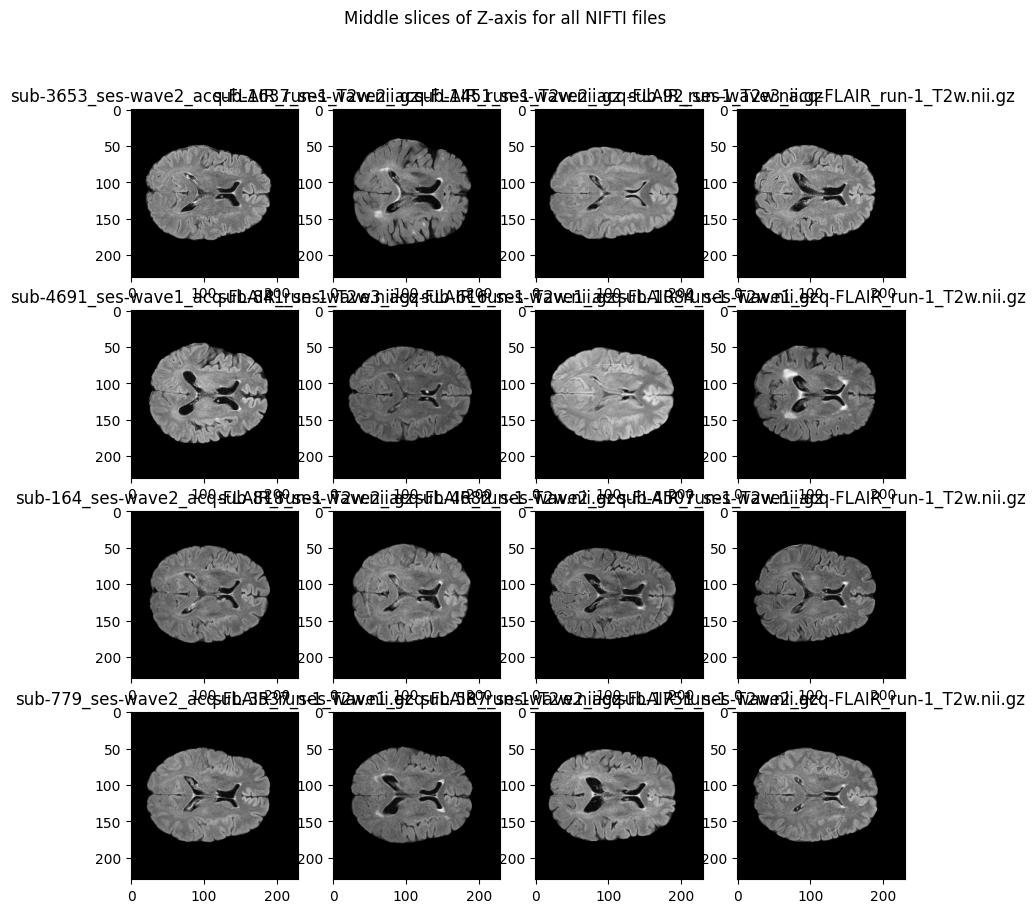

In [13]:
display_middle_slice_z(folder_path=T2_FLAIR_DALLAS, nb_images=16, figsize=10)

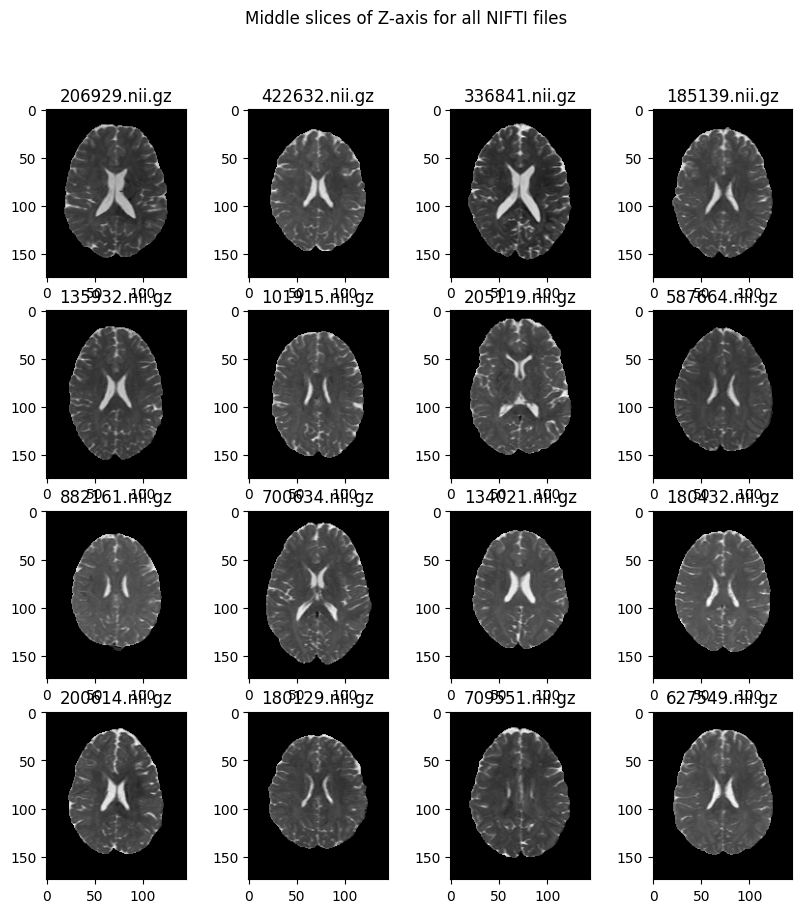

In [23]:
display_middle_slice_z(folder_path=f"{ADC_HCP_YA}", nb_images=16, figsize=10)

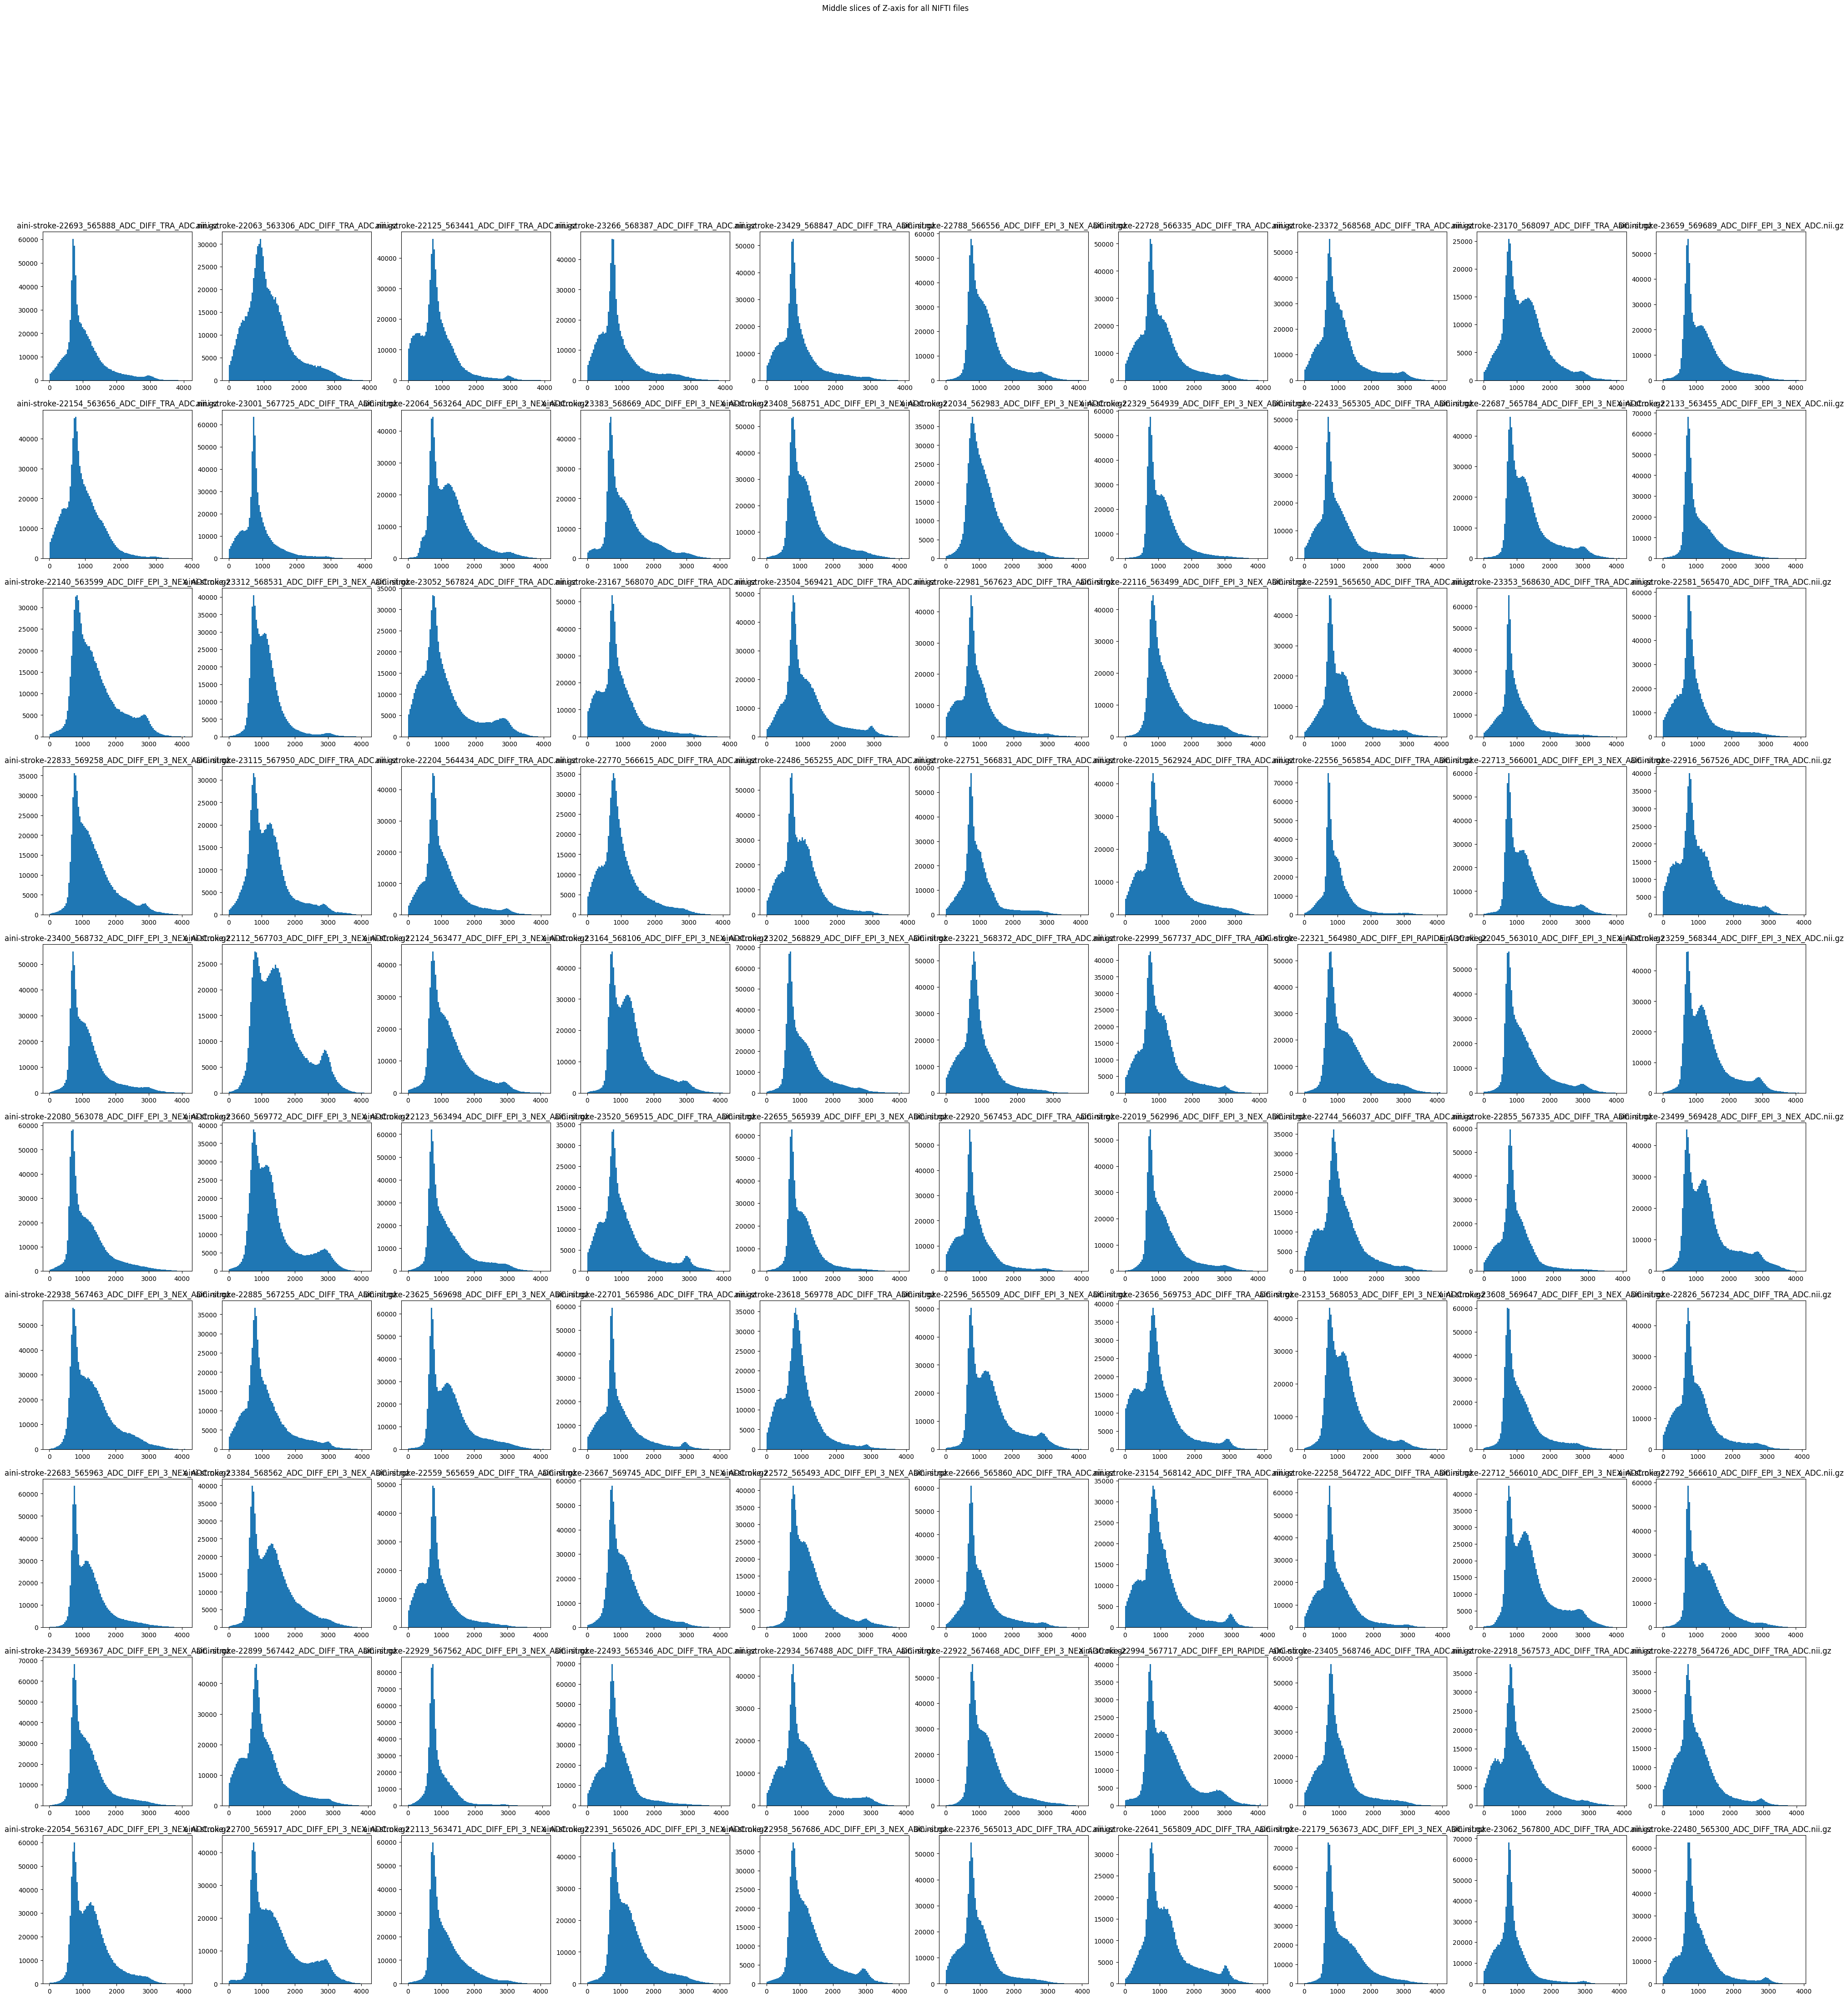

In [4]:
def display_middle_slice_z(folder_path):
    # List all files in the folder
    files = os.listdir(folder_path)[:100]

    # Filter out non-NIFTI files
    nifti_files = [f for f in files if f.endswith('.nii') or f.endswith('.nii.gz')]

    # Create a figure to display all middle slices
    fig, axes = plt.subplots(10, 10, figsize=(50, 50))

    for i, nifti_file in enumerate(nifti_files):
        # Load the NIFTI image
        img_path = os.path.join(folder_path, nifti_file)
        img = nib.load(img_path)
        data = img.get_fdata()

        # Get the middle slice index for the z-axis

        # Display the middle slice for the z-axis
        _, _, _ = axes[i//10, i%10].hist(data.flatten()[data.flatten()>0], 100)
        axes[i//10, i%10].set_title(f'{nifti_file}')

    # Set the title of the figure
    fig.suptitle('Middle slices of Z-axis for all NIFTI files')

    # Show the plot
    plt.show()

# Example usage
f"{aini_stroke_ADC}/AIT"


AIT (Accident ischemique transitoire) = Not visible on ADC ("healthy ADC")

In [8]:
clinical_data_2022 = pd.read_csv("/bettik/PROJECTS/pr-gin5_aini/fehrdelt/datasets/donnees_cliniques/Clinical_data_2022.csv")
clinical_data_2023 = pd.read_csv("/bettik/PROJECTS/pr-gin5_aini/fehrdelt/datasets/donnees_cliniques/Clinical_data_2023.csv")

In [9]:
correspondance_noms_2022 = pd.read_csv("/bettik/PROJECTS/pr-gin5_aini/fehrdelt/datasets/donnees_cliniques/correspondance_noms_2022.csv", names=["n°patient", "Shanoir_name"])
correspondance_noms_2023 = pd.read_csv("/bettik/PROJECTS/pr-gin5_aini/fehrdelt/datasets/donnees_cliniques/correspondance_noms_2023.csv", names=["n°patient", "Shanoir_name"])

In [10]:
correspondance_noms_2022.head()

,n°patient,Shanoir_name
0,2022UNVG-3,aini-stroke-22001
1,2022UNVG-4,aini-stroke-22002
2,2022UNVG-5,aini-stroke-22003
3,2022UNVG-6,aini-stroke-22004
4,2022UNVG-7,aini-stroke-22005


In [11]:
clinical_data_2022.head()

,n°patient,Age,sexe,UNV,mode_entree_CHUGA,alerte_AVC,date_admission,heure_admission,date_sortie,mode_sortie,...,type_recanalisation,date_thrombolyse,heure_thrombolyse,date_ponction,heure_ponction,date_recanalisation,heure_recanalisation,TICI_final,commentaire,fiche_validé
0,2022UNVG-18,47,H,Grenoble,via IRM directe,Oui,1/5/2022,11:35,1/8/2022,Domicile,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,OUI
1,2022UNVG-22,46,F,Grenoble,via SAU,Non,1/6/2022,10:08,1/10/2022,Domicile,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,OUI
2,2022UNVG-43,66,H,Grenoble,via SAU,Non,1/12/2022,17:56,1/17/2022,Domicile,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,OUI
3,2022UNVG-47,77,F,Grenoble,via SAU,Non,1/14/2022,16:52,1/18/2022,Domicile,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,OUI
4,2022UNVG-58,77,H,Grenoble,via SAU,Non,1/18/2022,17:25,1/22/2022,Domicile,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,OUI


In [12]:
clinical_data_2022 = pd.merge(clinical_data_2022, correspondance_noms_2022, how='left')
clinical_data_2023 = pd.merge(clinical_data_2023, correspondance_noms_2023, how='left')

In [13]:
AITs_2022 = clinical_data_2022.loc[clinical_data_2022["diagnostic"]=="AIT"]["Shanoir_name"]

AITs_2023 = clinical_data_2023.loc[clinical_data_2023["diagnostic"]=="AIT"]["Shanoir_name"]

In [19]:
clinical_data_2023.loc[clinical_data_2023["Shanoir_name"]=="aini-stroke-23503"]["diagnostic"]

790    Infarctus cérébral
Name: diagnostic, dtype: object

In [11]:
names_AITs = AITs_2022.to_list() + AITs_2023.to_list()
print(len(names_AITs))

137


In [15]:
print(names_AITs)

['aini-stroke-22016', 'aini-stroke-22019', 'aini-stroke-22037', 'aini-stroke-22040', 'aini-stroke-22049', 'aini-stroke-22051', 'aini-stroke-22059', nan, 'aini-stroke-22065', 'aini-stroke-22078', 'aini-stroke-22083', 'aini-stroke-22085', 'aini-stroke-22108', 'aini-stroke-22146', 'aini-stroke-22159', nan, 'aini-stroke-22171', 'aini-stroke-22177', 'aini-stroke-22181', 'aini-stroke-22188', 'aini-stroke-22211', 'aini-stroke-22228', 'aini-stroke-22243', 'aini-stroke-22256', 'aini-stroke-22267', 'aini-stroke-22287', 'aini-stroke-22288', 'aini-stroke-22294', 'aini-stroke-22309', 'aini-stroke-22314', 'aini-stroke-22327', 'aini-stroke-22329', 'aini-stroke-22337', 'aini-stroke-22347', 'aini-stroke-22351', 'aini-stroke-22357', 'aini-stroke-22375', 'aini-stroke-22424', 'aini-stroke-22445', 'aini-stroke-22455', nan, 'aini-stroke-22497', 'aini-stroke-22501', 'aini-stroke-22506', 'aini-stroke-22523', 'aini-stroke-22529', 'aini-stroke-22550', 'aini-stroke-22552', 'aini-stroke-22559', 'aini-stroke-22561

Pk ça commence à 2022UNVG-3
psk y'a pas date pour unvg-1 et 2 dans le csv de Zaza